In [1]:
# tables
import pandas as pd
import numpy as np
# graphics
import seaborn as sns
import matplotlib.pyplot as plt
# text processing
import nltk
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# expressions
import re
# machine learning
from sklearn.model_selection import train_test_split
# Deal with html text
from bs4 import BeautifulSoup
# Multiprocessing
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm

## Installation des packages 

In [23]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/boleynkenkem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/boleynkenkem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/boleynkenkem/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

In [2]:
debug = False

Plus on a des données d'entrées mieux c'est. Nous avons effectué 10  requêtes SQL afin d'avoir 10 fichiers csv: QueryResults.csv, QueryResults(1).csv à QueryResults(9).csv. Ces fichiers ont été générés en respectant la consignes qui demandait de faire des requêtes avec des contraintes sur les id.  Nos requêtes SQL ont été effectué sur les id compris entre 0 et 50 000. Chaque requête a pris les résultats non nuls dans une plage de 100 000 valeurs. Il y a eu différentes requêtes afin d'avoir des fichiers d'une taille inférieure à 25Mb.

Nous dump sql se trouve dans le fichier sql_requery.txt

## Chargement des données 

### Concaténations de tous les inputs 

In [3]:
df_main = pd.DataFrame(columns=["Id", "Title", "Body", "Tags"])

In [4]:
df_main = df_main.append(pd.read_csv("input/QueryResults.csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(1).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(2).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(3).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(4).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(5).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(6).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(7).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(8).csv"), ignore_index = True)
df_main = df_main.append(pd.read_csv("input/QueryResults(9).csv"), ignore_index = True)

Nous pouvons afficher les colonnes pour voir.

In [5]:
df_main.columns

Index(['Id', 'Title', 'Body', 'Tags'], dtype='object')

### informations générales sur la table principale

In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73942 entries, 0 to 73941
Data columns (total 4 columns):
Id       73942 non-null object
Title    73942 non-null object
Body     73942 non-null object
Tags     73942 non-null object
dtypes: object(4)
memory usage: 2.3+ MB


In [7]:
df_main

,Id,Title,Body,Tags
0,4,How to convert decimal to double in C#?,<p>I want to use a <code>Track-Bar</code> to c...,<c#><floating-point><type-conversion><double><...
1,6,Percentage width child element in absolutely p...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>
2,9,"In C#, how do I calculate someone's age based ...",<p>Given a <code>DateTime</code> representing ...,<c#><.net><datetime>
3,11,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...
4,13,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...
5,14,Difference between Math.Floor() and Math.Trunc...,"<p>What is the difference between <a href=""htt...",<.net><math>
6,16,Filling a DataSet or DataTable from a LINQ que...,<p>How do you expose a LINQ query as an ASMX w...,<c#><linq><web-services><.net-3.5>
7,17,Binary Data in MySQL,"<p>How do I store binary data in <a href=""http...",<mysql><database><binary-data><data-storage>
8,19,What is the fastest way to get the value of π?,<p>I'm looking for the fastest way to obtain t...,<performance><algorithm><language-agnostic><un...
9,24,Throw an error in a MySQL trigger,<p>If I have a <code>trigger</code> <code>befo...,<mysql><database><triggers>


## Inspection générale des données 

### Title feature

In [8]:
for i in range(10):
    print(df_main.loc[i, "Title"])

How to convert decimal to double in C#?
Percentage width child element in absolutely positioned parent on Internet Explorer 7
In C#, how do I calculate someone's age based on a DateTime type birthday?
Calculate relative time in C#
Determine a user's timezone
Difference between Math.Floor() and Math.Truncate()
Filling a DataSet or DataTable from a LINQ query result set
Binary Data in MySQL
What is the fastest way to get the value of π?
Throw an error in a MySQL trigger


Nous pouvons essayer de compter le nombre de mots dans la "feature" Title. 

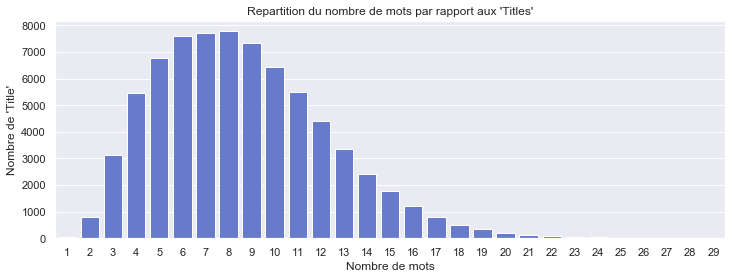

In [9]:
sns.set()
colors = sns.color_palette("hls", 8)
plt.figure(figsize=(12,4))
sns.countplot(df_main["Title"].map(lambda field:len(field.split(' '))).values, color=colors[5])
plt.title("Repartition du nombre de mots par rapport aux 'Titles'")
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre de 'Title'")
plt.show()

Essayons d'afficher les valeurs uniques avec leur proportion numériques afin davoir les informations sur le nombre de mots à valeurs faibles. 

In [10]:
unique, values = np.unique(df_main["Title"].map(lambda field:len(field.split(' '))).values, return_counts=True)
pd.DataFrame({'unique':unique, 'count':values}).loc[20:]

,unique,count
20,21,129
21,22,86
22,23,55
23,24,31
24,25,25
25,26,13
26,27,9
27,28,4
28,29,3


Regardons les mots les plus fréquents. Il est toujours intéressant de regarder les mots les plus fréquents avant de faire du clean.

In [11]:
df_main.loc[0:20, "Title"].values

array(['How to convert decimal to double in C#?',
       'Percentage width child element in absolutely positioned parent on Internet Explorer 7',
       "In C#, how do I calculate someone's age based on a DateTime type birthday?",
       'Calculate relative time in C#', "Determine a user's timezone",
       'Difference between Math.Floor() and Math.Truncate()',
       'Filling a DataSet or DataTable from a LINQ query result set',
       'Binary Data in MySQL',
       'What is the fastest way to get the value of π?',
       'Throw an error in a MySQL trigger',
       'How to use the C socket API in C++ on z/OS',
       'Unloading a ByteArray using Actionscript 3',
       'Check for changes to an SQL Server table?',
       'Reliable timer in a console application',
       'Best way to allow plugins for a PHP application',
       'Multiple submit buttons in an HTML form',
       'How do I get a distinct, ordered list of names from a DataTable using LINQ?',
       'Microsoft Office 2007 fi

Nous devons supprimer les caractères spéciaux et les ponctuations. Nous alons écrire une fonction qui prend en entrée un text, supprimer les caractères spéciaux, les ponctuations et enleve les majuscules. 

In [12]:
def pre_tokenize(text):
    
    # Suppression des points
    text = text.replace('.', ' ')
    # Suppressions des ponctuations
    expr = ["\n"] #["?", ",", ".", "'", ";", ":", "!", "\n", "(", ")", "|", "_", "-", "`", "+", "-", "*", "/"]
    for char in expr:
        text = text.replace(char, ' ')
    # Miniscule
    text = str(np.char.lower(text))
    
    return text

In [13]:
df_main["Title"] = df_main["Title"].map(pre_tokenize)

In [14]:
df_main.loc[0:20, "Title"].values

array(['how to convert decimal to double in c#?',
       'percentage width child element in absolutely positioned parent on internet explorer 7',
       "in c#, how do i calculate someone's age based on a datetime type birthday?",
       'calculate relative time in c#', "determine a user's timezone",
       'difference between math floor() and math truncate()',
       'filling a dataset or datatable from a linq query result set',
       'binary data in mysql',
       'what is the fastest way to get the value of π?',
       'throw an error in a mysql trigger',
       'how to use the c socket api in c++ on z/os',
       'unloading a bytearray using actionscript 3',
       'check for changes to an sql server table?',
       'reliable timer in a console application',
       'best way to allow plugins for a php application',
       'multiple submit buttons in an html form',
       'how do i get a distinct, ordered list of names from a datatable using linq?',
       'microsoft office 2007 fi

Nous allons aplliquer la Lemmatization afin de donner aux mots de notre texte une forme neutre. Nous le faisons dans la fonction suivantes. 

In [15]:
def lemmatize_text(text):

    lem = WordNetLemmatizer()
    text_lemmatized = []
    words = word_tokenize(text)
    for word in words:
        word = lem.lemmatize(word, "v")
        text_lemmatized.append(word)
    text = ' '.join(text_lemmatized)
    
    return text

In [16]:
df_main["Title"] = df_main["Title"].map(lemmatize_text)

In [17]:
df_main.loc[0:20, "Title"].values

array(['how to convert decimal to double in c # ?',
       'percentage width child element in absolutely position parent on internet explorer 7',
       "in c # , how do i calculate someone 's age base on a datetime type birthday ?",
       'calculate relative time in c #', "determine a user 's timezone",
       'difference between math floor ( ) and math truncate ( )',
       'fill a dataset or datatable from a linq query result set',
       'binary data in mysql',
       'what be the fastest way to get the value of π ?',
       'throw an error in a mysql trigger',
       'how to use the c socket api in c++ on z/os',
       'unload a bytearray use actionscript 3',
       'check for change to an sql server table ?',
       'reliable timer in a console application',
       'best way to allow plugins for a php application',
       'multiple submit button in an html form',
       'how do i get a distinct , order list of name from a datatable use linq ?',
       'microsoft office 2007 file

In [18]:
df_main["Title_tokens"] = df_main["Title"].map(word_tokenize)

In [19]:
df_main.loc[0:20, "Title_tokens"].values

array([list(['how', 'to', 'convert', 'decimal', 'to', 'double', 'in', 'c', '#', '?']),
       list(['percentage', 'width', 'child', 'element', 'in', 'absolutely', 'position', 'parent', 'on', 'internet', 'explorer', '7']),
       list(['in', 'c', '#', ',', 'how', 'do', 'i', 'calculate', 'someone', "'s", 'age', 'base', 'on', 'a', 'datetime', 'type', 'birthday', '?']),
       list(['calculate', 'relative', 'time', 'in', 'c', '#']),
       list(['determine', 'a', 'user', "'s", 'timezone']),
       list(['difference', 'between', 'math', 'floor', '(', ')', 'and', 'math', 'truncate', '(', ')']),
       list(['fill', 'a', 'dataset', 'or', 'datatable', 'from', 'a', 'linq', 'query', 'result', 'set']),
       list(['binary', 'data', 'in', 'mysql']),
       list(['what', 'be', 'the', 'fastest', 'way', 'to', 'get', 'the', 'value', 'of', 'π', '?']),
       list(['throw', 'an', 'error', 'in', 'a', 'mysql', 'trigger']),
       list(['how', 'to', 'use', 'the', 'c', 'socket', 'api', 'in', 'c++', 'on', '

On est confronté à un problème, le 'word_tokenize' sépare les caractères comme «#» de «c#». Si "C#" est utilisé deux fois, le modèle trouvera deux mots identiques au lieu d'un. Additionnons tous les mots pour compter les fréquences. 

In [20]:
np_text = df_main["Title_tokens"].values.copy()
full_title_text_splitted = []
for i in range(len(np_text)):
    full_title_text_splitted.extend(np_text[i])
del np_text

In [21]:
full_title_text_splitted[0:20]

['how',
 'to',
 'convert',
 'decimal',
 'to',
 'double',
 'in',
 'c',
 '#',
 '?',
 'percentage',
 'width',
 'child',
 'element',
 'in',
 'absolutely',
 'position',
 'parent',
 'on',
 'internet']

Nous pouvons maintenant voir le nombre de mots uniques. 

In [22]:
unique, count = np.unique(full_title_text_splitted, return_counts=True)

In [23]:
len(unique)

25842

Regardons une partie de nos données. 

In [24]:
np.concatenate((unique[0:100], unique[-100:]))

array(['!', '#', '$', '%', '&', "'", "''", "'*", "'***", "'+new", "'-",
       "'-lmcheck", "'-re", "'/", "'//", "'/dnntest", "'/forum/default",
       "'/reports", "'/subversion/main/db/transactions/0-1", "'0110",
       "'07", "'08", "'09", "'1033", "'20", "'20050411", "'20060201",
       "'397", "'404", "'77", "'90", "'91", "'95", "'=", "'==", "'\\",
       "'\\0", "'\\\\", "'\\n", "'^", "'^m", "'__cdecl", "'__progname",
       "'absolute", "'accept", "'access", "'accessdeniedexception",
       "'action_name", "'actions", "'add", "'administrator", "'advanced",
       "'ajaxcontroltoolkit", "'allow_url_fopen", "'an", "'analysis",
       "'anonymous", "'ansi", "'anti", "'any", "'app_web_hamznvwf",
       "'app_web_kh7-x3ka", "'application/javascript", "'argument", "'as",
       "'ascii", "'asp", "'astoria", "'atomic", "'attempt",
       "'atttributes", "'audience", "'author", "'autotest", "'back",
       "'bad", "'beforesubmit", "'best", "'binary", "'bind", "'bit",
       "'bits", "'b

Nous pouvons voir qu'il y'a beaucoup de mots qui peuvent être des nombres, ou des mots qui ont quelques quelques caractères spéciaux, d'autres écrits deux fois. Regardons la répartition.

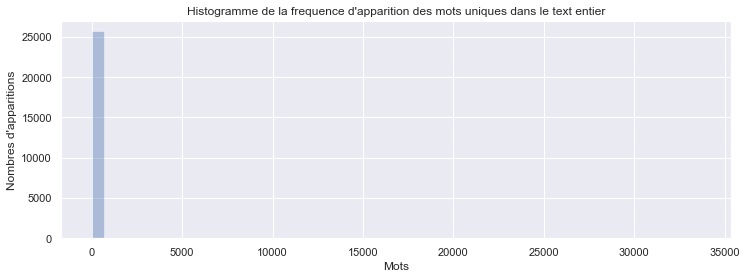

In [25]:
sns.set()
plt.figure(figsize=(12,4))
sns.distplot(count, kde=False)
plt.title("Histogramme de la frequence d'apparition des mots uniques dans le text entier")
plt.xlabel("Mots")
plt.ylabel("Nombres d'apparitions")
plt.show()

La plupart de la distribution semble proche de 1. Regardons et comptons le nombre de mots apparaissant plus de 1000 fois.

In [26]:
count[np.where(count > 1000)]

array([ 3396,  1121,  2451,  5177,  5173,  4479,  2964,  4487, 33671,
        5269, 23830,  1302,  1067,  5278,  6986,  1008,  2054,  1248,
        3221, 12452,  2939,  1063,  1042,  3730,  1591,  1040,  4981,
        1223,  1674,  1879,  1686,  1778,  1907,  1487, 10037,  1199,
        4373,  1299,  8541,  1112,  5334,  1302,  2827,  1406, 16467,
        1034,  9045,  1149, 21026,  1091,  2093,  2550,  1585,  1268,
        1199,  1115,  1052,  1518,  1112,  1057,  6331,  2305,  1765,
        8276,  4979,  2711,  1321,  1640,  1131,  1453,  1046,  1090,
        2664,  1270,  1332,  1085,  3150,  1665,  1318,  1399,  1365,
        1666, 13432,  2190, 23393,  1212,  7714,  1020,  1395,  1437,
        1157,  3098,  2094,  5927,  2535,  1817,  2227,  6470,  1270,
        1064,  3262])

In [27]:
len(np.where(count > 1000)[0])

101

Nombre d'occurence des mots qui apparaissent le plus

In [28]:
max(count)

33671

In [29]:
unique[np.argmax(count)]

'?'

Affichons de manière plus détaillé l'histogramme. 

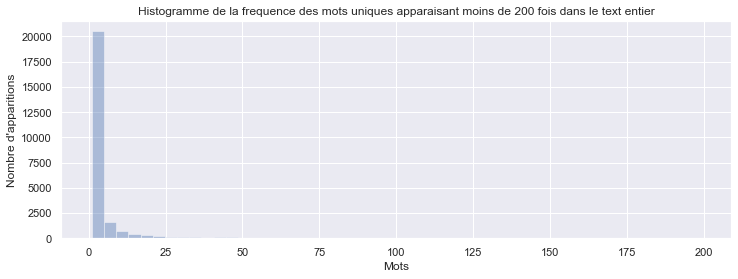

In [30]:
sns.set()
plt.figure(figsize=(12,4))
sns.distplot(count[np.where(count < 200)], kde=False)
plt.title("Histogramme de la frequence des mots uniques apparaisant moins de 200 fois dans le text entier")
plt.xlabel("Mots")
plt.ylabel("Nombre d'apparitions")
plt.show()

In [31]:
len(np.where(count == 1)[0])

15483

Le nombre de mots avec une seule occurrence est énorme. Ces mots donnent trop peu d'informations et prennent trop de place mémoire. Il pourrait être intéressant d'essayer de les supprimer dans notre modélsation. Ou du moins, supprimez tous ceux qui ne sont pas dans le ditionnaire ( parce que peu de chances d'être réutilisé ...). Un nettoyage poussé peut être une solution, en supprimant, des chiffres, des caractères spéciaux ... On les garde pour l'instant.

In [32]:
title_words_to_del = unique[np.where(count == 1)]
title_words_to_del

array(["''", "'***", "'+new", ..., '⨝', '首', '？'], dtype='<U50')

In [33]:
del full_title_text_splitted

### Tags feature

In [34]:
for i in range(10):
    print(df_main.loc[i, "Tags"])

<c#><floating-point><type-conversion><double><decimal>
<html><css><internet-explorer-7>
<c#><.net><datetime>
<c#><datetime><time><datediff><relative-time-span>
<html><browser><timezone><user-agent><timezone-offset>
<.net><math>
<c#><linq><web-services><.net-3.5>
<mysql><database><binary-data><data-storage>
<performance><algorithm><language-agnostic><unix><pi>
<mysql><database><triggers>


Séparons les tags dans une liste pour mieux analyser.

In [35]:
df_main["Tags"] = df_main["Tags"].map(lambda field:field[1:-1].split('><'))

In [36]:
for i in range(10):
    print(df_main.loc[i, "Tags"])

['c#', 'floating-point', 'type-conversion', 'double', 'decimal']
['html', 'css', 'internet-explorer-7']
['c#', '.net', 'datetime']
['c#', 'datetime', 'time', 'datediff', 'relative-time-span']
['html', 'browser', 'timezone', 'user-agent', 'timezone-offset']
['.net', 'math']
['c#', 'linq', 'web-services', '.net-3.5']
['mysql', 'database', 'binary-data', 'data-storage']
['performance', 'algorithm', 'language-agnostic', 'unix', 'pi']
['mysql', 'database', 'triggers']


On peut ajouter, du moins temporairement un champ dans le DataFrame principale. C'est le nombre de tags par posts. Il pourrait être utilisé pour obtenir une distribution.

In [37]:
df_main["nb_tags"] = df_main["Tags"].map(lambda field:len(field))

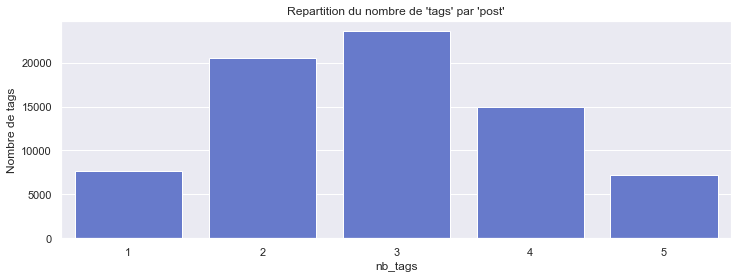

In [38]:
sns.set()
colors = sns.color_palette("hls", 8)
plt.figure(figsize=(12,4))
sns.countplot(df_main["nb_tags"], color=colors[5])
plt.title("Repartition du nombre de 'tags' par 'post'")
plt.ylabel("Nombre de tags")
plt.show()

In [39]:
np.unique(df_main["nb_tags"], return_counts=True)

(array([1, 2, 3, 4, 5]), array([ 7701, 20573, 23579, 14917,  7172]))

Les valeurs uniques et leurs proportions numériques donnent des informations sur les articles avec 5 tags. Nous pouvons maintenant lister toutes les tags et voir les fréquentes

In [40]:
np_text = df_main["Tags"].values.copy()
full_text_tags_splitted = []
for i in range(len(np_text)):
    full_text_tags_splitted.extend(np_text[i])
full_text_tags_splitted[0:20]
del np_text

In [41]:
full_text_tags_splitted[0:20]

['c#',
 'floating-point',
 'type-conversion',
 'double',
 'decimal',
 'html',
 'css',
 'internet-explorer-7',
 'c#',
 '.net',
 'datetime',
 'c#',
 'datetime',
 'time',
 'datediff',
 'relative-time-span',
 'html',
 'browser',
 'timezone',
 'user-agent']

In [42]:
unique, count = np.unique(full_text_tags_splitted, return_counts=True)

In [43]:
print("Nombre de tags: {}".format(len(full_text_tags_splitted)))
print("Nombre de tags uniques: {}".format(len(unique)))

Nombre de tags: 215112
Nombre de tags uniques: 10921


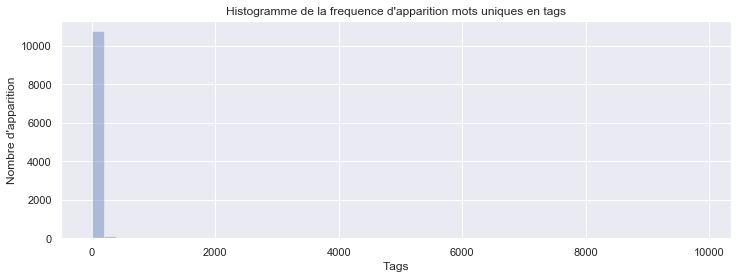

In [44]:
sns.set()
plt.figure(figsize=(12,4))
sns.distplot(count, kde=False)
plt.title("Histogramme de la frequence d'apparition mots uniques en tags")
plt.xlabel("Tags")
plt.ylabel("Nombre d'apparition")
plt.show()

Comme précedemment avec les 'Title', la plupart des tags n'apparaissent qu'une seule fois dont le max est:

In [45]:
unique[np.argmax(count)]

'c#'